<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/DSPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRAIN.CSV - PREPROCESSING - EDA AFTER CLEANING

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/traincsv.csv')

In [4]:
df.head()

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_catgeory  
0                4  
1                1  
2                4  
3                4  
4                4

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23170 entries, 0 to 23169
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       23170 non-null  int64  
 1   outlet_city       23170 non-null  object 
 2   luxury_sales      23165 non-null  float64
 3   fresh_sales       23162 non-null  float64
 4   dry_sales         23168 non-null  float64
 5   cluster_catgeory  23169 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
import pandas as pd

# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get summary statistics
print(df.describe())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_catgeory  
0                4  
1                1  
2                4  
3                4  
4                4  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23170 entries, 0 to 23169
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       23170 non-null  int64  
 1   outlet_city       23170 non-null  object 
 2   luxury_sales      23165 non-null  float64
 3   fresh_sales       23162 non-null  float64
 4   dry_sales         23168 non-null  float64
 5   cluster_catgeory  23169

In [7]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values with appropriate strategy
df.fillna(method='ffill', inplace=True)

# Option 2: Drop missing values if they are not significant
df.dropna(inplace=True)

Customer_ID         0
outlet_city         0
luxury_sales        5
fresh_sales         8
dry_sales           2
cluster_catgeory    1
dtype: int64


<ipython-input-7-c2e95a0d4967>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)


In [8]:
# Check for missing values
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [9]:
# Convert Customer_ID to integer
df['Customer_ID'] = df['Customer_ID'].astype('int64')

# Check if 'outlet_city' column exists before converting
if 'outlet_city' in df.columns:
    # Convert categorical columns if necessary
    df['outlet_city'] = df['outlet_city'].astype('category')
else:
    print("Column 'outlet_city' not found in the DataFrame.")
    # Handle the missing column as needed.

In [10]:
import pandas as pd
import numpy as np

# Function to convert non-numeric values to NaN
def clean_numeric(column):
    return pd.to_numeric(column, errors='coerce')

# Apply the function to all three sales columns
df['luxury_sales'] = clean_numeric(df['luxury_sales'])
df['fresh_sales'] = clean_numeric(df['fresh_sales'])
df['dry_sales'] = clean_numeric(df['dry_sales'])

# Optionally, fill or remove NaN values
df.dropna(subset=['luxury_sales', 'fresh_sales', 'dry_sales'], inplace=True)

# Verify changes
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23170 entries, 0 to 23169
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Customer_ID       23170 non-null  int64   
 1   outlet_city       23170 non-null  category
 2   luxury_sales      23170 non-null  float64 
 3   fresh_sales       23170 non-null  float64 
 4   dry_sales         23170 non-null  float64 
 5   cluster_catgeory  23170 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 928.2+ KB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_catgeor

In [11]:
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [12]:
import numpy as np

# Identify outliers using IQR
Q1 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.25)
Q3 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['luxury_sales', 'fresh_sales', 'dry_sales']] < (Q1 - 1.5 * IQR)) |
          (df[['luxury_sales', 'fresh_sales', 'dry_sales']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [13]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [14]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23170 entries, 0 to 23169
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Customer_ID       23170 non-null  int64   
 1   outlet_city       23170 non-null  category
 2   luxury_sales      23170 non-null  float64 
 3   fresh_sales       23170 non-null  float64 
 4   dry_sales         23170 non-null  float64 
 5   cluster_catgeory  23170 non-null  object  
dtypes: category(1), float64(3), int64(1), object(1)
memory usage: 928.2+ KB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243.99   

  cluster_catgeor

In [15]:
# Check unique values in cluster_category
print("Unique values in cluster_category:", df['cluster_catgeory'].unique())

Unique values in cluster_category: ['4' '1' '99' '2' '5' '3' '6' '6\\']


In [16]:
import pandas as pd

# Convert cluster_category to numeric (handling mixed types)
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Keep only values between 1 and 6
df = df[df['cluster_catgeory'].between(1, 6)]

# Convert to integer type
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

# Verify changes
print("Unique values after cleaning:", df['cluster_catgeory'].unique())
print(df.info())
print(df.head())

Unique values after cleaning: [4 1 2 5 3 6]
<class 'pandas.core.frame.DataFrame'>
Index: 23168 entries, 0 to 23169
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Customer_ID       23168 non-null  int64   
 1   outlet_city       23168 non-null  category
 2   luxury_sales      23168 non-null  float64 
 3   fresh_sales       23168 non-null  float64 
 4   dry_sales         23168 non-null  float64 
 5   cluster_catgeory  23168 non-null  int64   
dtypes: category(1), float64(3), int64(2)
memory usage: 1.1 MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0     10493832    Kelaniya       1209.60       756.00    5292.00   
1     10178643    Moratuwa       1590.12      1060.08    6007.12   
2     10513916     Wattala       2288.88      1481.04    9155.52   
3     10334589     Wattala       2274.94      1739.66    9099.76   
4     10458365    Kelaniya       2345.49      2069.55    9243

<ipython-input-16-cad4c2dafa5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)


In [17]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Assuming 'df' is your preprocessed DataFrame
file_path = "/content/drive/My Drive/preprocessed_data.csv"

# Save DataFrame as CSV
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

Mounted at /content/drive
File saved to /content/drive/My Drive/preprocessed_data.csv


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv("/preprocessed_data (1).csv")

In [21]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23168 entries, 0 to 23167
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       23168 non-null  int64  
 1   outlet_city       23168 non-null  object 
 2   luxury_sales      23168 non-null  float64
 3   fresh_sales       23168 non-null  float64
 4   dry_sales         23168 non-null  float64
 5   cluster_catgeory  23168 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 1.1+ MB
None
        Customer_ID  luxury_sales   fresh_sales     dry_sales  \
count  2.316800e+04  23168.000000  23168.000000  23168.000000   
mean   1.038723e+07   1748.821520   1247.457432   6745.273340   
std    2.243687e+05    529.454599    391.912073   1957.827981   
min    1.000000e+07    750.150000    500.200000   3251.300000   
25%    1.019229e+07   1301.417500    922.342500   5050.267500   
50%    1.038679e+07   1730.720000   1226.720000   6742.5400

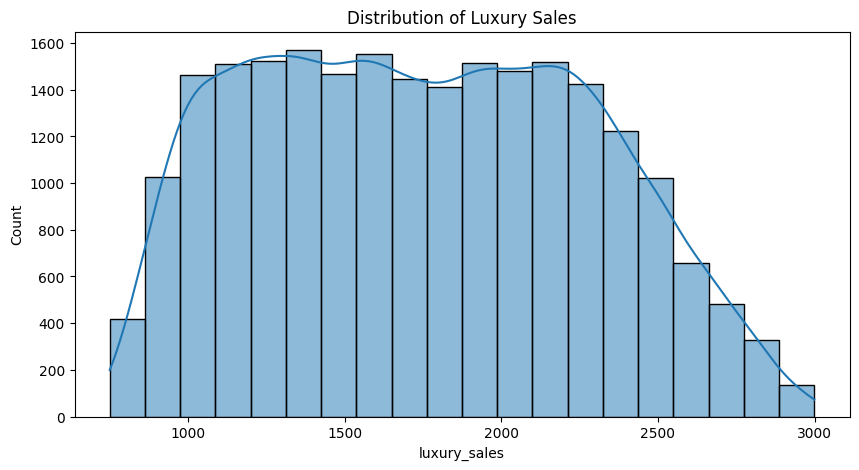

In [22]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

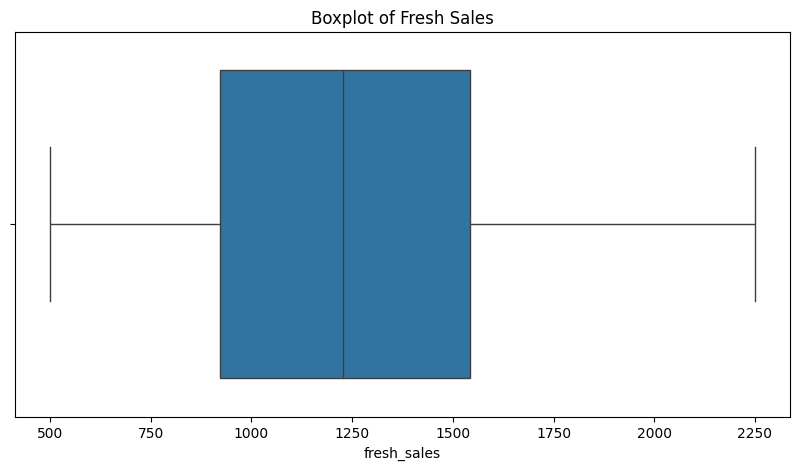

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

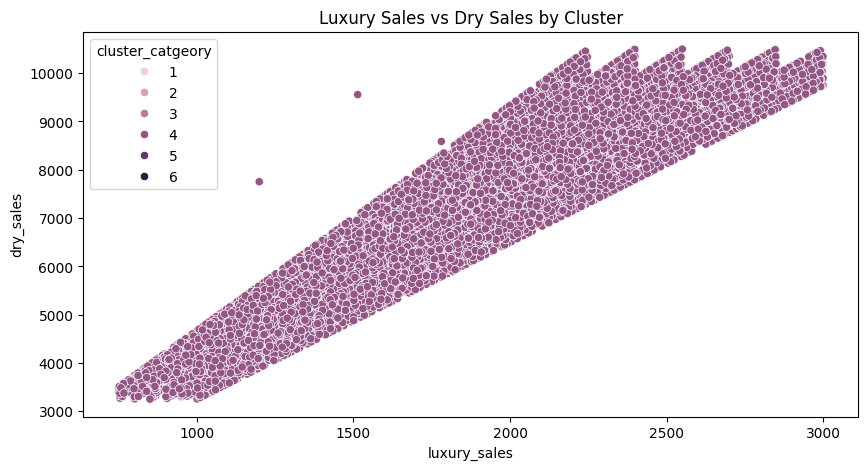

In [24]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df['cluster_catgeory'])
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.show()

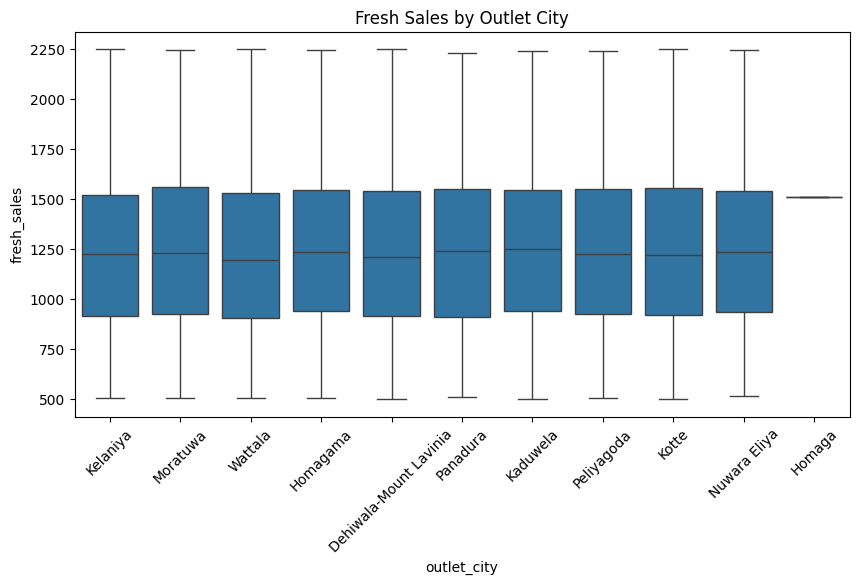

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

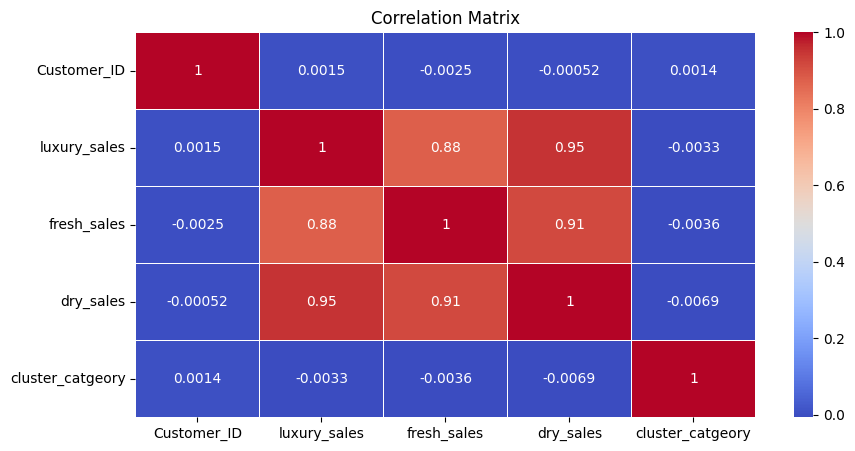

In [26]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

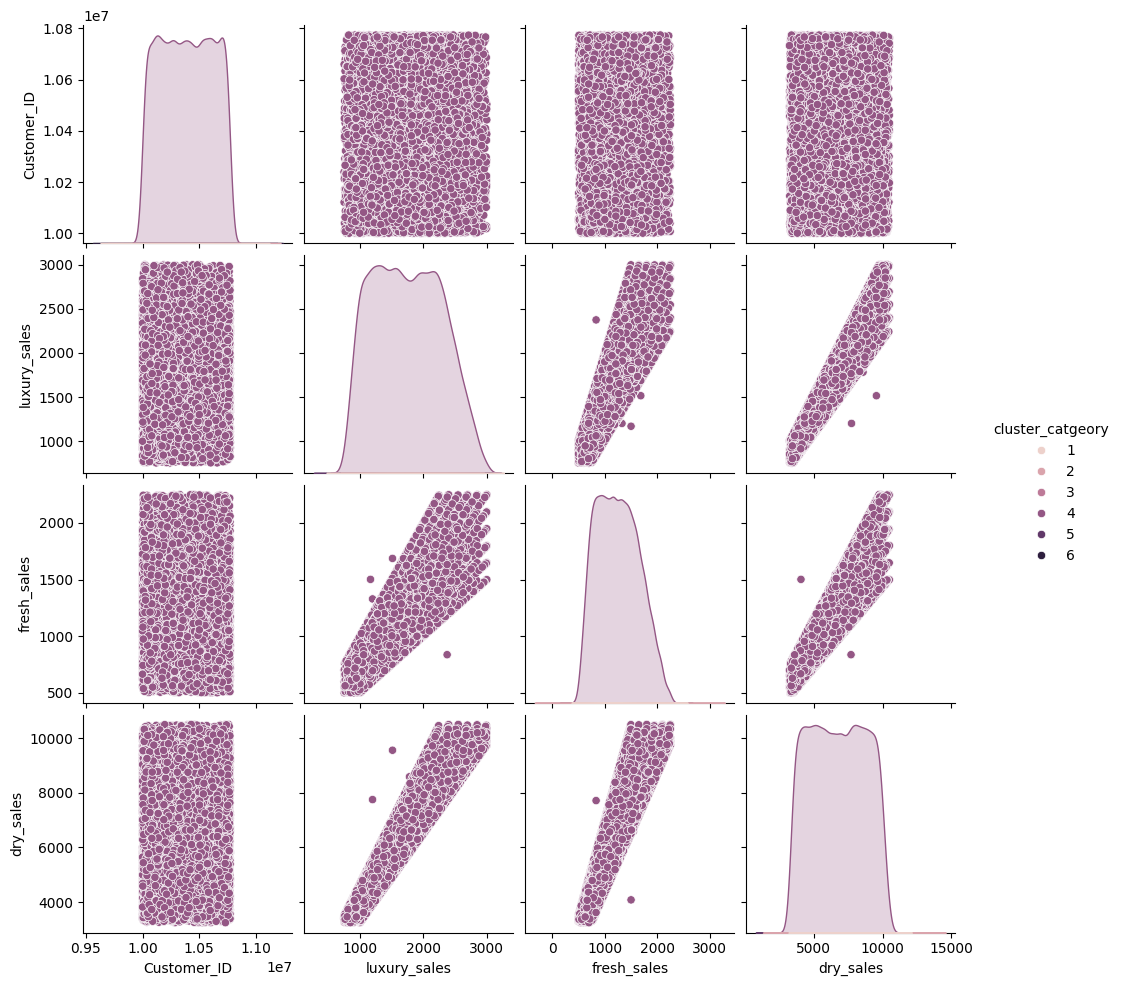

In [27]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

# Encoding Categorical Variable ('outlet_city') using Label Encoding
encoder = LabelEncoder()
df['outlet_city_encoded'] = encoder.fit_transform(df['outlet_city'])

In [29]:
# Concatenate encoded columns and drop original
df.drop(columns=['outlet_city'], inplace=True)

In [30]:
# Scaling Sales Columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[sales_columns] = scaler.fit_transform(df[sales_columns])


In [31]:
# Display final processed dataset
print(df.head())

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.018469    -1.254026  -0.742305                 4   
1     10178643     -0.299752    -0.478121  -0.377035                 1   
2     10513916      1.020050     0.596020   1.231109                 4   
3     10334589      0.993720     1.255928   1.202627                 4   
4     10458365      1.126974     2.097691   1.276297                 4   

   outlet_city_encoded  
0                    4  
1                    6  
2                   10  
3                   10  
4                    4  


In [32]:
# Save the processed dataset
df.to_csv("processed_data.csv", index=False)

TRAIN.CSV - EDA BEFORE CLEANING

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the dataset
df = pd.read_csv("/content/traincsv.csv")

<ipython-input-34-d53c48e40b0d>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/traincsv.csv")


In [35]:
# Display basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB
None
        Customer_ID
count  7.741530e+05
mean   1.038708e+07
std    2.234795e+05
min    1.000000e+07
25%    1.019354e+07
50%    1.038708e+07
75%    1.058062e+07
max    1.077415e+07


In [37]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['luxury_sales'], bins=20, kde=True)
plt.title("Distribution of Luxury Sales")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d2058a42520> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d2058a40040> (for post_execute):


KeyboardInterrupt: 

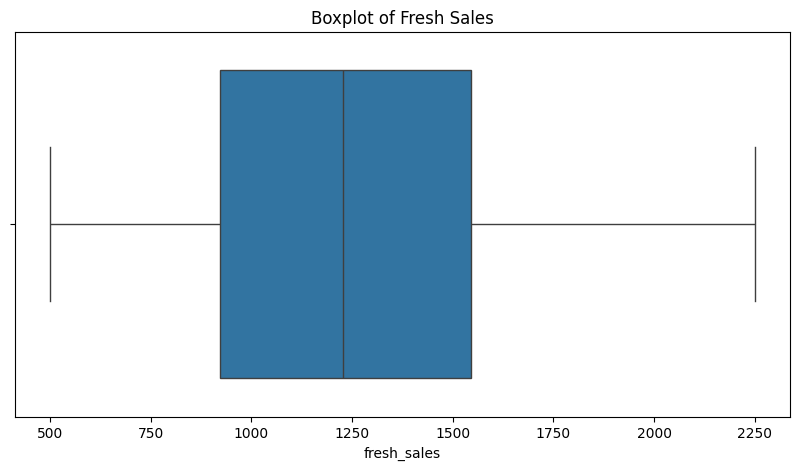

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame

# Convert 'fresh_sales' column to numeric, handling errors
def convert_to_numeric(value):
    try:
        # Attempt to convert directly to numeric
        return pd.to_numeric(value)
    except ValueError:
        # If conversion fails, try removing non-numeric characters and convert
        cleaned_value = ''.join(filter(str.isdigit, str(value)))
        if cleaned_value:
            return pd.to_numeric(cleaned_value)
        else:
            # If no numeric characters found, return NaN
            return float('nan')

df['fresh_sales_numeric'] = df['fresh_sales'].apply(convert_to_numeric)

# Drop rows with NaN values in the new numeric column if necessary
df.dropna(subset=['fresh_sales_numeric'], inplace=True)

# Now create the boxplot using the numeric column
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['fresh_sales'])
plt.title("Boxplot of Fresh Sales")
plt.show()

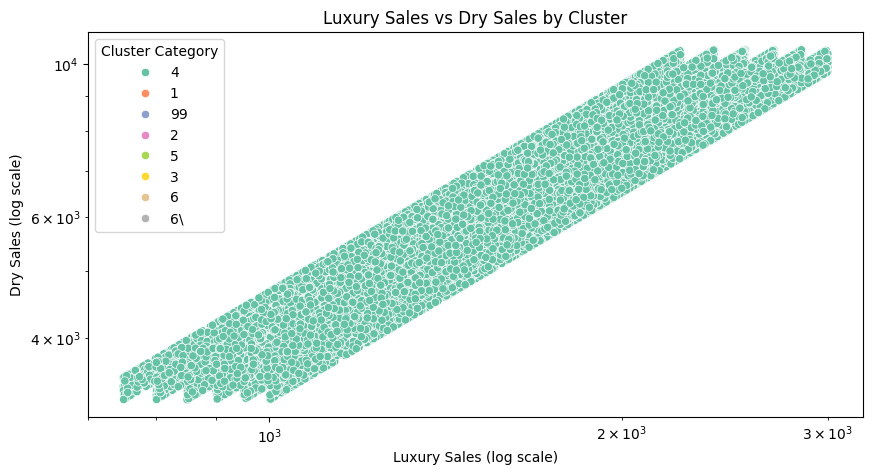

In [ ]:
#bivariate analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to convert sales strings to numeric values
def convert_sales_to_numeric(value):
    word_to_num = {
        'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
        'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
        'fifteen': 15, 'sixteen': 16, 'seventeen': 17, 'eighteen': 18,
        'nineteen': 19, 'twenty': 20, 'thirty': 30, 'forty': 40,
        'fifty': 50, 'sixty': 60, 'seventy': 70, 'eighty': 80,
        'ninety': 90, 'hundred': 100, 'thousand': 1000,
        'rupees': 1,  # Treat "rupees" as 1 for simplicity
        'hundread': 100  # Correct the typo
    }

    try:
        return pd.to_numeric(value)
    except (ValueError, TypeError):
        words = str(value).lower().replace("and", "").split()
        total, current_num = 0, 0

        for word in words:
            if word in word_to_num:
                num = word_to_num[word]
                if num in {100, 1000}:
                    current_num *= num
                else:
                    current_num += num
            else:
                total += current_num
                current_num = 0

        total += current_num
        return total

# Apply conversion
df['luxury_sales'] = df['luxury_sales'].apply(convert_sales_to_numeric)
df['dry_sales'] = df['dry_sales'].apply(convert_sales_to_numeric)

# Scatter plot
plt.figure(figsize=(10, 5))
# Check if 'cluster_category' exists, if not, try 'cluster_catgeory'
hue_column = 'cluster_category' if 'cluster_category' in df.columns else 'cluster_catgeory'
sns.scatterplot(x=df['luxury_sales'], y=df['dry_sales'], hue=df[hue_column], palette="Set2")

plt.xscale('log')  # Log scale for better visualization
plt.yscale('log')  # Log scale for better visualization
plt.title("Luxury Sales vs Dry Sales by Cluster")
plt.xlabel("Luxury Sales (log scale)")
plt.ylabel("Dry Sales (log scale)")
plt.legend(title="Cluster Category")
plt.show()

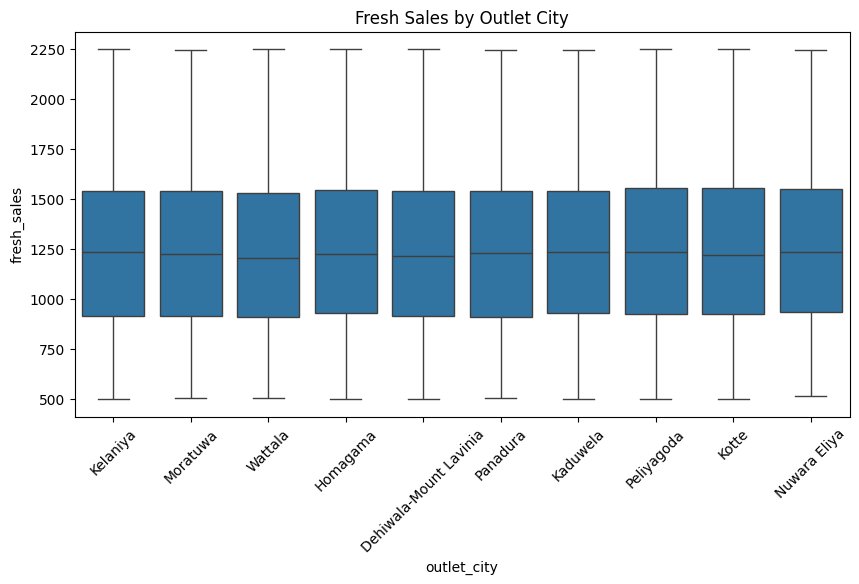

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='outlet_city', y='fresh_sales', data=df)
plt.title("Fresh Sales by Outlet City")
plt.xticks(rotation=45)
plt.show()

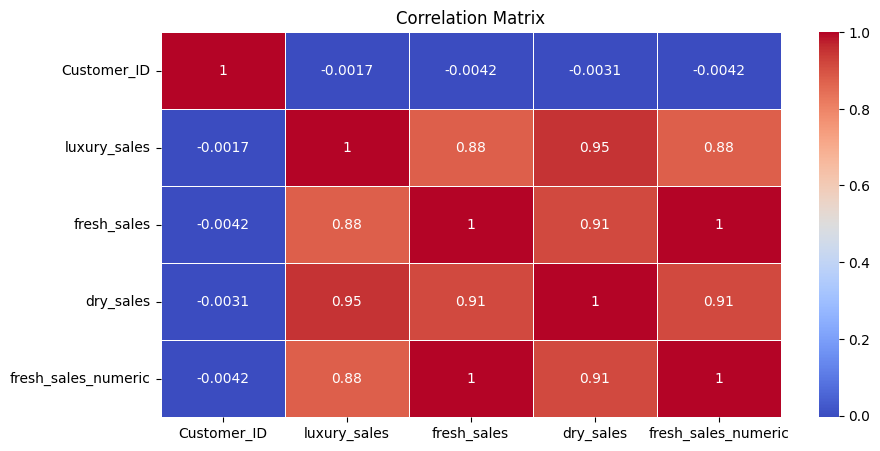

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(10, 5))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

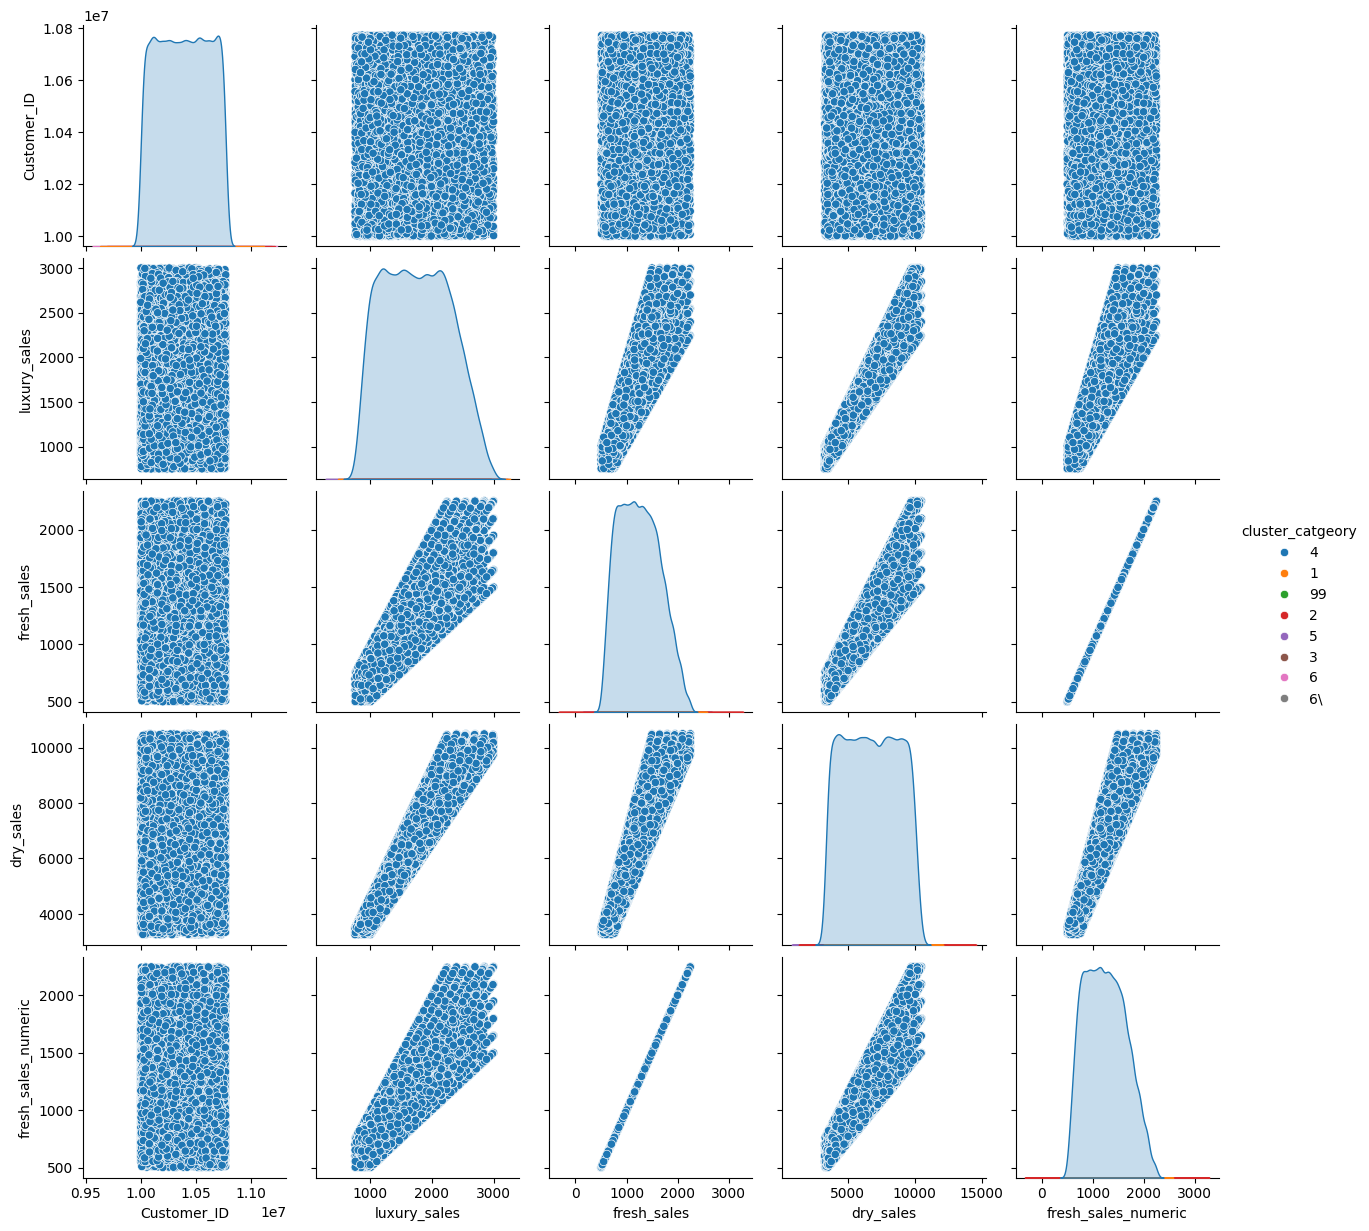

In [ ]:
sns.pairplot(df, hue='cluster_catgeory')
plt.show()

Test.csv before cleaning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/test.csv")

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get summary statistics
print(df.describe())

   Customer_ID outlet_city luxury_sales fresh_sales dry_sales
0        33574  batticaloa       2686.5        3582     12537
1        10089  batticaloa      1717.56     2576.34   9446.58
2        38329  batticaloa       854.04     1242.24   5201.88
3        11376  batticaloa      1638.12     2320.67   9282.68
4        12410  batticaloa      1039.09     1518.67   5435.24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB
None
        Customer_ID
count  40749.000000
mean   20375.000000
std    11763.367396
min        1.000000
25%    10188.000000
50%    20375.000000
75%    30562.000000
max    4074

Summary Statistics (Before Cleaning):
        Customer_ID     dry_sales
count  40749.000000  40748.000000
mean   20375.000000   4691.533221
std    11763.367396   3411.019219
min        1.000000    500.900000
25%    10188.000000   1799.457500
50%    20375.000000   3755.345000
75%    30562.000000   7183.460000
max    40749.000000  13989.500000


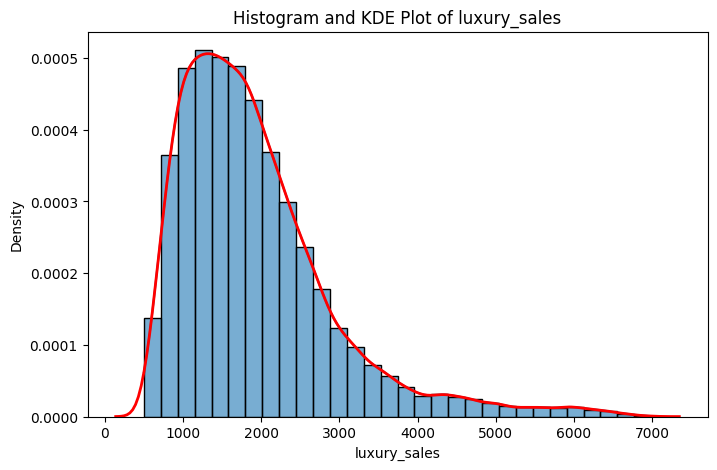

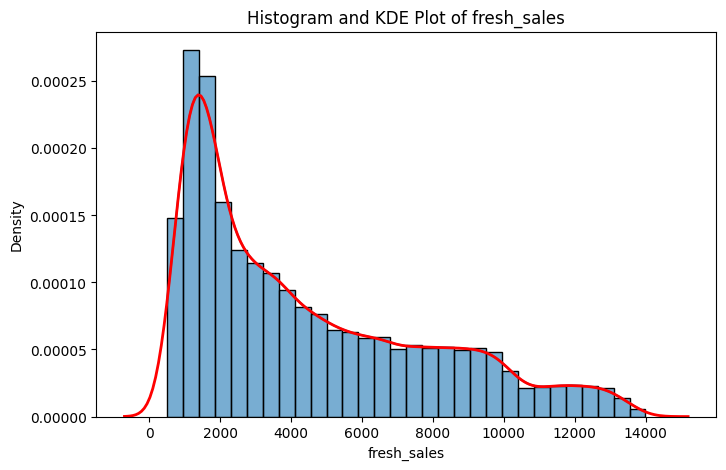

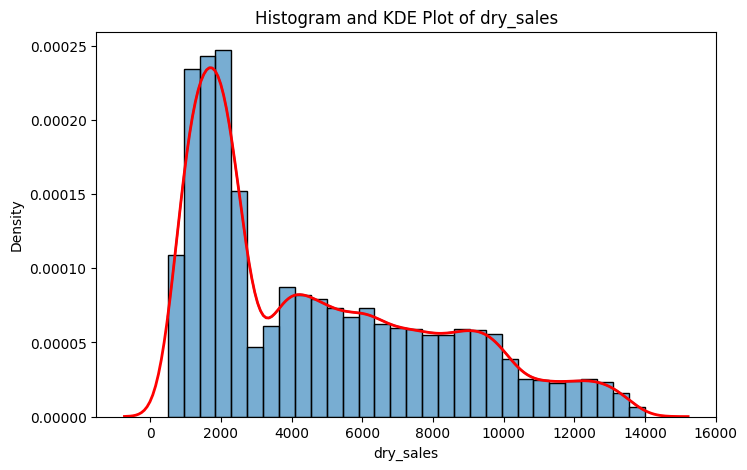

Univariate Histogram and KDE Analysis Before cleaning completed.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Univariate Analysis - Histogram and KDE (Before Cleaning)
print("Summary Statistics (Before Cleaning):")
print(df.describe())

# Selecting only numerical columns, excluding identifiers
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Function to convert potential object columns to numeric (dry_sales, luxury_sales, fresh_sales)
def to_numeric(x):
    try:
        x = x.replace('Ruppees', '').replace(',', '')
        x = x.replace('Seven Hundread and sixty', '760')
        return pd.to_numeric(x)
    except (ValueError, AttributeError):
        return np.nan

# Convert to numeric if needed
for col in ['dry_sales', 'luxury_sales', 'fresh_sales']:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(to_numeric).astype(np.float64)

# Recalculate numeric_cols if needed
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Plot Histogram and KDE together
for column in numeric_cols.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numeric_cols[column], bins=30, kde=True, edgecolor='black', stat='density', alpha=0.6)
    sns.kdeplot(numeric_cols[column], color='red', linewidth=2)
    plt.title(f"Histogram and KDE Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

print("Univariate Histogram and KDE Analysis Before cleaning completed.")

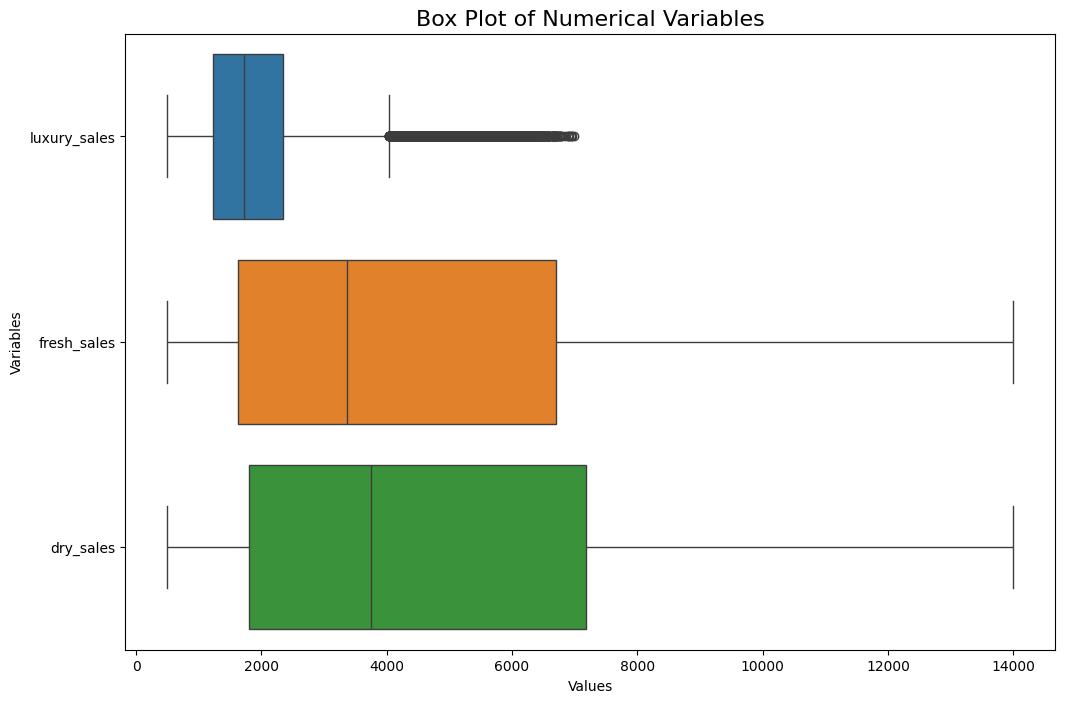

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Plot Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols, orient='h')
plt.title("Box Plot of Numerical Variables", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Variables")
plt.show()

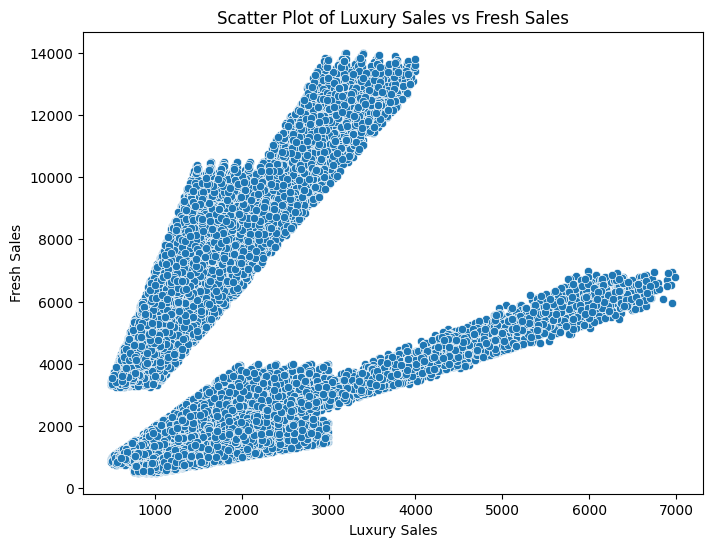

In [ ]:
#Bivariate Analysis

# Scatter plot of 'luxury_sales' vs 'fresh_sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='luxury_sales', y='fresh_sales')
plt.title("Scatter Plot of Luxury Sales vs Fresh Sales")
plt.xlabel('Luxury Sales')
plt.ylabel('Fresh Sales')
plt.show()

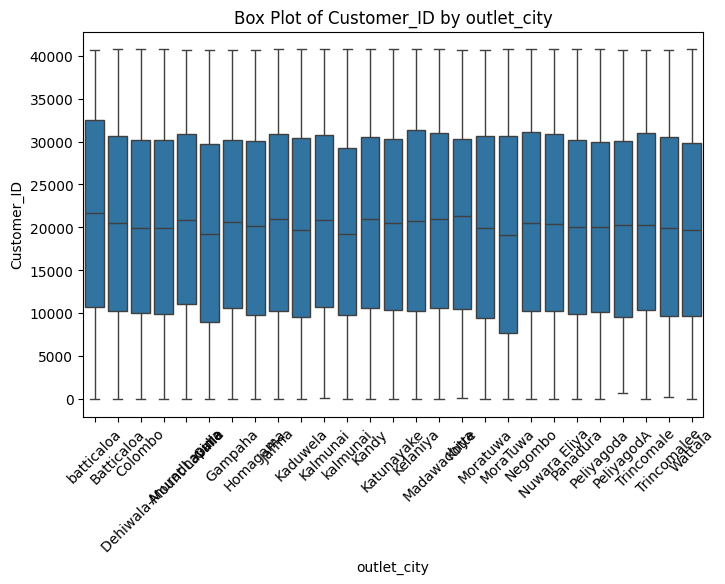

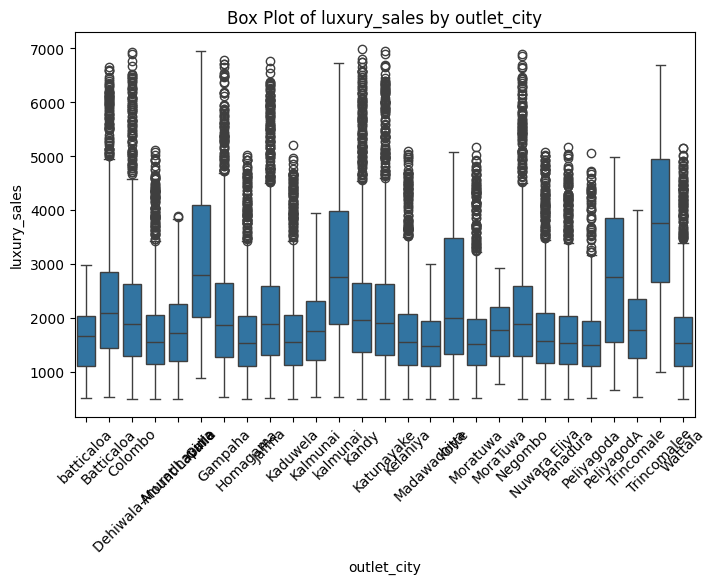

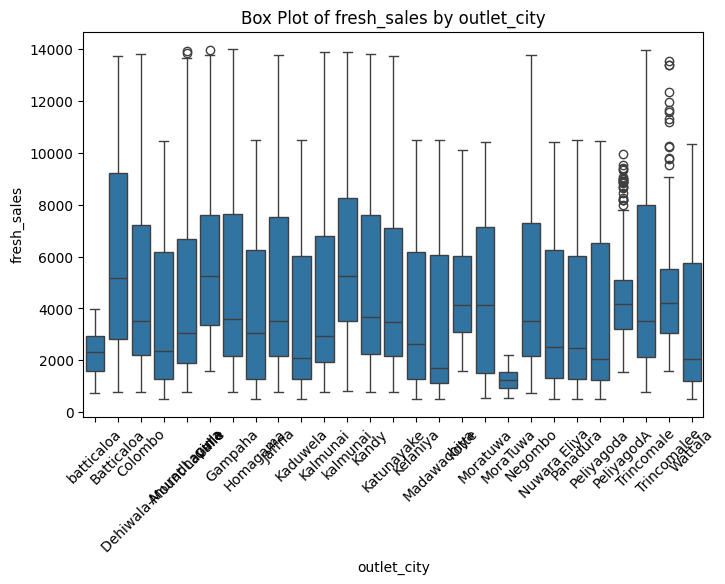

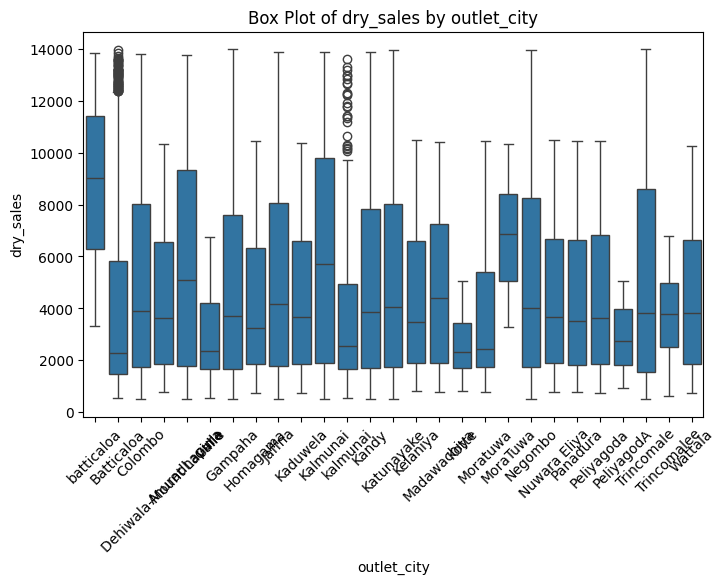

In [ ]:
# Checking relationship between a categorical and a numerical variable
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Generate boxplots for numerical variables grouped by each categorical variable
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f"Box Plot of {num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

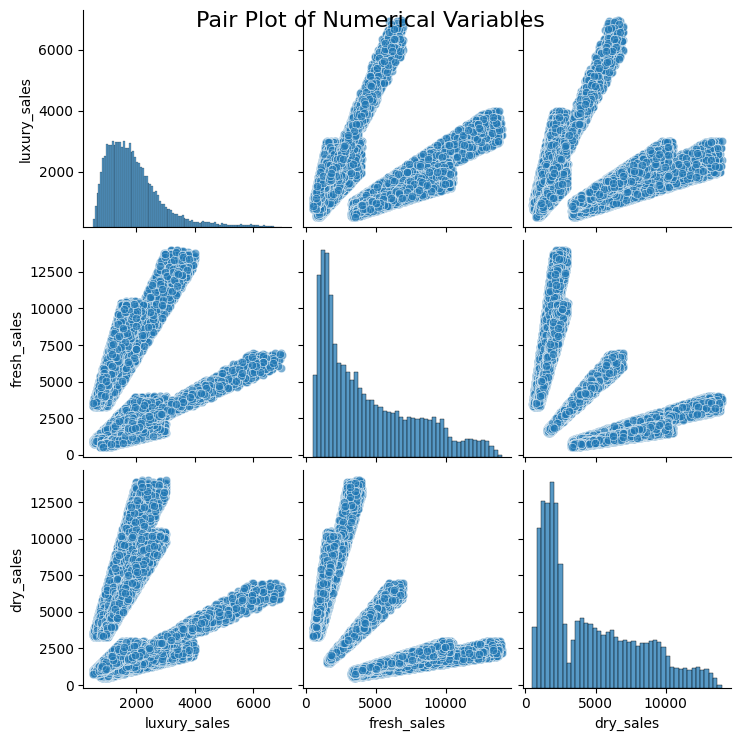

In [ ]:
#Multivariate Analysis
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Create Pair Plot
sns.pairplot(numeric_cols, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Variables", fontsize=16)
plt.show()

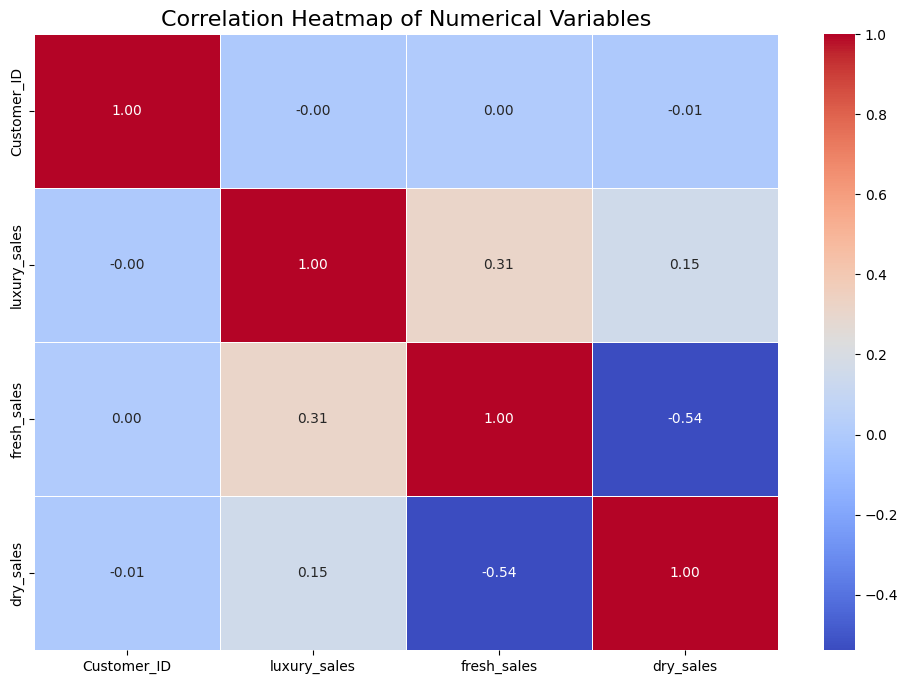

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

Test.csv after cleaning

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/test.csv")

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
# Display first few rows
print(df.head())

# Check data types and missing values
print(df.info())

# Get summary statistics
print(df.describe())

   Customer_ID outlet_city luxury_sales fresh_sales dry_sales
0        33574  batticaloa       2686.5        3582     12537
1        10089  batticaloa      1717.56     2576.34   9446.58
2        38329  batticaloa       854.04     1242.24   5201.88
3        11376  batticaloa      1638.12     2320.67   9282.68
4        12410  batticaloa      1039.09     1518.67   5435.24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40749 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer_ID   40749 non-null  int64 
 1   outlet_city   40749 non-null  object
 2   luxury_sales  40749 non-null  object
 3   fresh_sales   40749 non-null  object
 4   dry_sales     40749 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB
None
        Customer_ID
count  40749.000000
mean   20375.000000
std    11763.367396
min        1.000000
25%    10188.000000
50%    20375.000000
75%    30562.000000
max    4074

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values with appropriate strategy
df.fillna(method='ffill', inplace=True)

# Drop missing values if they are not significant
df.dropna(inplace=True)

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


<ipython-input-56-c2e95a0d4967>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill (or use mean/median)


In [ ]:
# Check for missing values
print(df.isnull().sum())

Customer_ID     0
outlet_city     0
luxury_sales    0
fresh_sales     0
dry_sales       0
dtype: int64


In [ ]:
# Convert Customer_ID to integer (if applicable)
df['Customer_ID'] = df['Customer_ID'].astype('int64')

# Check if 'outlet_city' column exists before converting
if 'outlet_city' in df.columns:
    # Convert categorical columns if necessary
    df['outlet_city'] = df['outlet_city'].astype('category')
else:
    print("Column 'outlet_city' not found in the DataFrame.")
    # Handle the missing column as needed

In [ ]:
# Function to convert non-numeric values to NaN
def clean_numeric(column):
    return pd.to_numeric(column, errors='coerce')  # Converts invalid values to NaN

# Apply the function to all three sales columns
df['luxury_sales'] = clean_numeric(df['luxury_sales'])
df['fresh_sales'] = clean_numeric(df['fresh_sales'])
df['dry_sales'] = clean_numeric(df['dry_sales'])

# Optionally, fill or remove NaN values
df.dropna(subset=['luxury_sales', 'fresh_sales', 'dry_sales'], inplace=True)  # Removes rows with NaN

# Verify changes
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 40745 entries, 0 to 40748
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Customer_ID   40745 non-null  int64   
 1   outlet_city   40745 non-null  category
 2   luxury_sales  40745 non-null  float64 
 3   fresh_sales   40745 non-null  float64 
 4   dry_sales     40745 non-null  float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 1.6 MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales
0        33574  batticaloa       2686.50      3582.00   12537.00
1        10089  batticaloa       1717.56      2576.34    9446.58
2        38329  batticaloa        854.04      1242.24    5201.88
3        11376  batticaloa       1638.12      2320.67    9282.68
4        12410  batticaloa       1039.09      1518.67    5435.24


In [ ]:
# Identify outliers using IQR
Q1 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.25)
Q3 = df[['luxury_sales', 'fresh_sales', 'dry_sales']].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df[['luxury_sales', 'fresh_sales', 'dry_sales']] < (Q1 - 1.5 * IQR)) |
          (df[['luxury_sales', 'fresh_sales', 'dry_sales']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 38904 entries, 0 to 40745
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Customer_ID   38904 non-null  int64   
 1   outlet_city   38904 non-null  category
 2   luxury_sales  38904 non-null  float64 
 3   fresh_sales   38904 non-null  float64 
 4   dry_sales     38904 non-null  float64 
dtypes: category(1), float64(3), int64(1)
memory usage: 1.5 MB
None
   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales
0        33574  batticaloa       2686.50      3582.00   12537.00
1        10089  batticaloa       1717.56      2576.34    9446.58
2        38329  batticaloa        854.04      1242.24    5201.88
3        11376  batticaloa       1638.12      2320.67    9282.68
4        12410  batticaloa       1039.09      1518.67    5435.24


In [ ]:
# Assuming 'df' is your preprocessed DataFrame
file_path = "/content/drive/My Drive/preprocessed_data.csv"

# Save DataFrame as CSV
df.to_csv(file_path, index=False)

print(f"File saved to {file_path}")

File saved to /content/drive/My Drive/preprocessed_data.csv


In [ ]:
#EDA after cleaning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/preprocessed_data.csv")

In [ ]:
# Display basic info after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38904 entries, 0 to 38903
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Customer_ID   38904 non-null  int64  
 1   outlet_city   38904 non-null  object 
 2   luxury_sales  38904 non-null  float64
 3   fresh_sales   38904 non-null  float64
 4   dry_sales     38904 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:
# Display first few rows after cleaning
df.head()

Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales
0        33574  batticaloa       2686.50      3582.00   12537.00
1        10089  batticaloa       1717.56      2576.34    9446.58
2        38329  batticaloa        854.04      1242.24    5201.88
3        11376  batticaloa       1638.12      2320.67    9282.68
4        12410  batticaloa       1039.09      1518.67    5435.24

Summary Statistics (After Cleaning):
        Customer_ID  luxury_sales   fresh_sales     dry_sales
count  38904.000000  38904.000000  38904.000000  38904.000000
mean   20383.749409   1779.580516   4415.532578   4675.940820
std    11771.359310    740.288520   3421.200394   3486.124044
min        1.000000    500.800000    500.300000    500.900000
25%    10167.750000   1197.820000   1574.680000   1757.137500
50%    20384.500000   1673.775000   3144.190000   3473.360000
75%    30592.250000   2237.045000   6900.172500   7379.070000
max    40749.000000   4031.680000  13995.100000  13989.500000


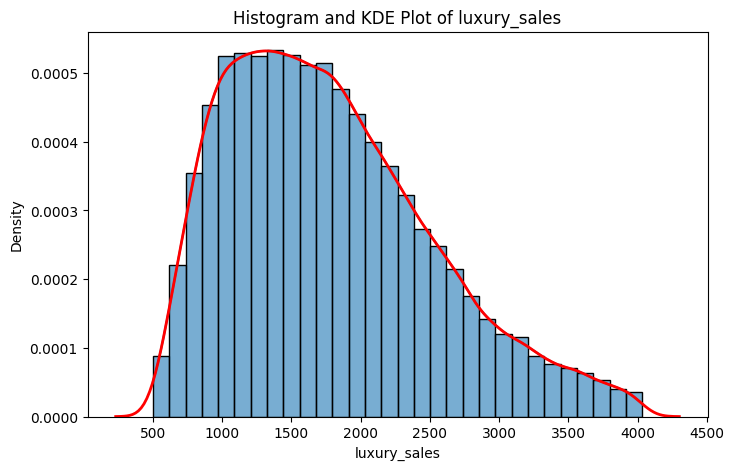

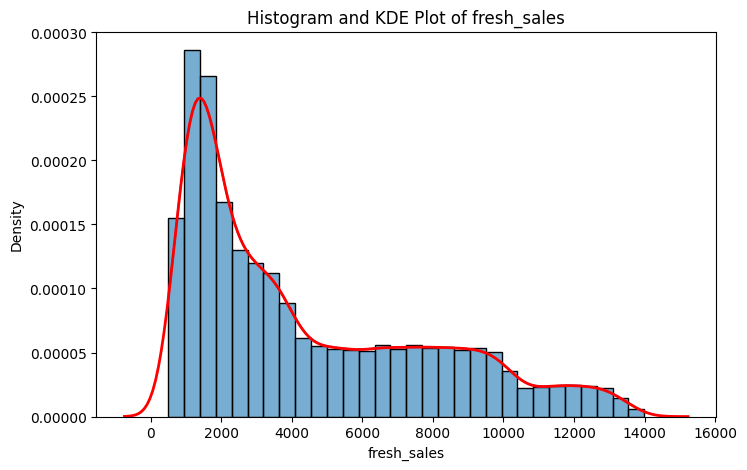

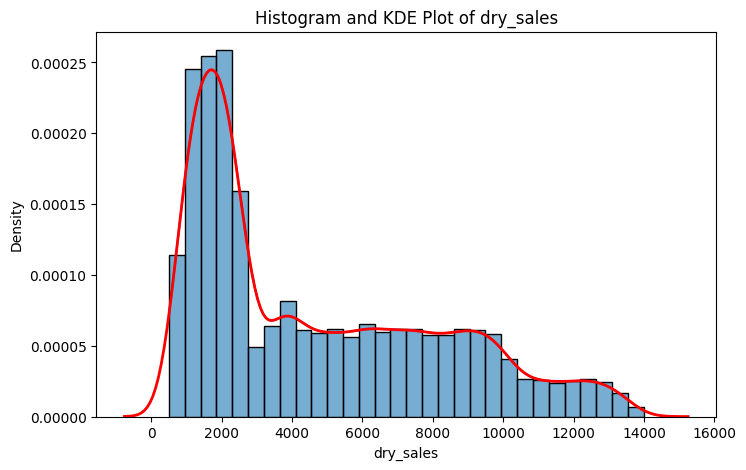

Univariate Histogram and KDE Analysis after cleaning completed.


In [ ]:
# Univariate Analysis - Histogram and KDE (After Cleaning)
print("Summary Statistics (After Cleaning):")
print(df.describe())

# Selecting only numerical columns, excluding identifiers
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Plot Histogram and KDE together
for column in numeric_cols.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(numeric_cols[column], bins=30, kde=True, edgecolor='black', stat='density', alpha=0.6)
    sns.kdeplot(numeric_cols[column], color='red', linewidth=2)
    plt.title(f"Histogram and KDE Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()

print("Univariate Histogram and KDE Analysis after cleaning completed.")

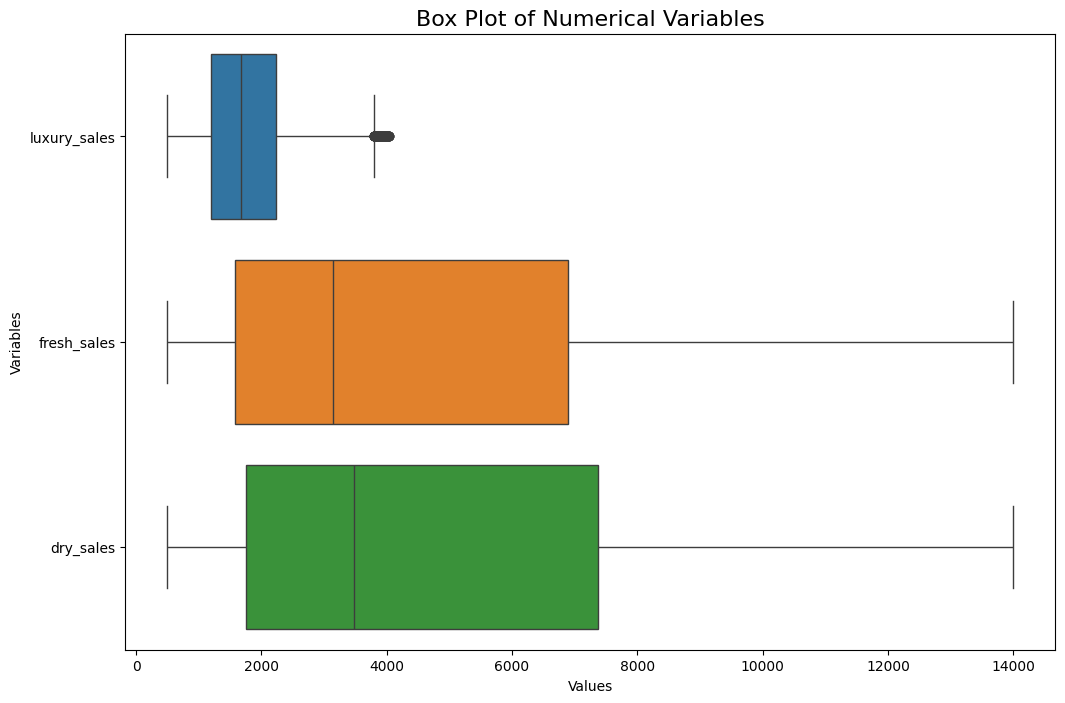

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Plot Box Plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols, orient='h')
plt.title("Box Plot of Numerical Variables", fontsize=16)
plt.xlabel("Values")
plt.ylabel("Variables")
plt.show()

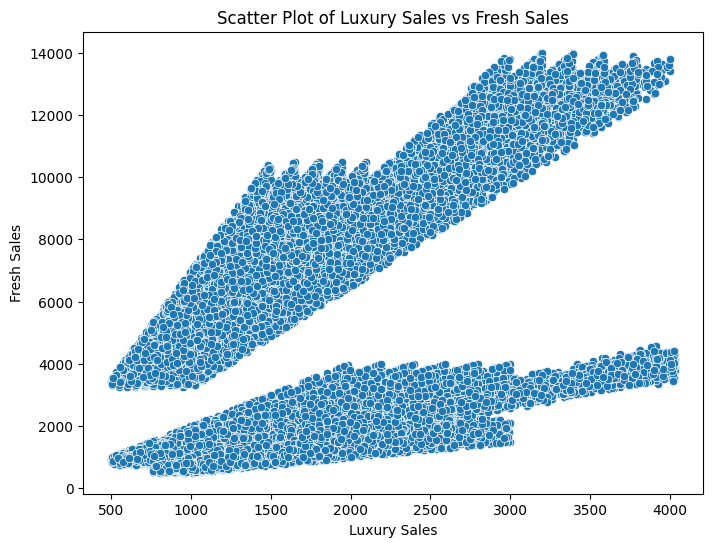

In [ ]:
#Bivariate Analysis

# Scatter plot of 'luxury_sales' vs 'fresh_sales'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='luxury_sales', y='fresh_sales')
plt.title("Scatter Plot of Luxury Sales vs Fresh Sales")
plt.xlabel('Luxury Sales')
plt.ylabel('Fresh Sales')
plt.show()

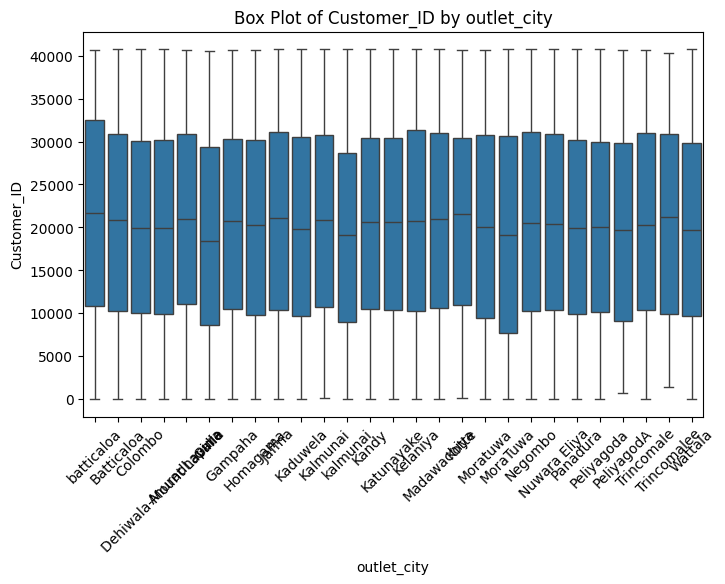

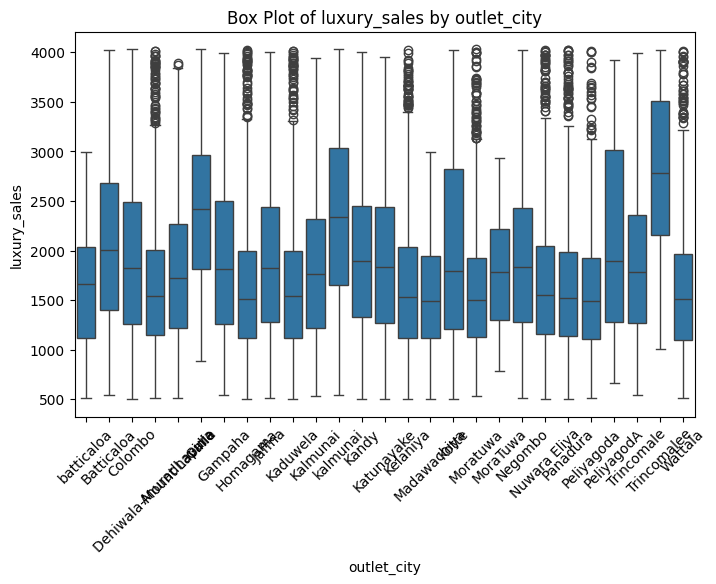

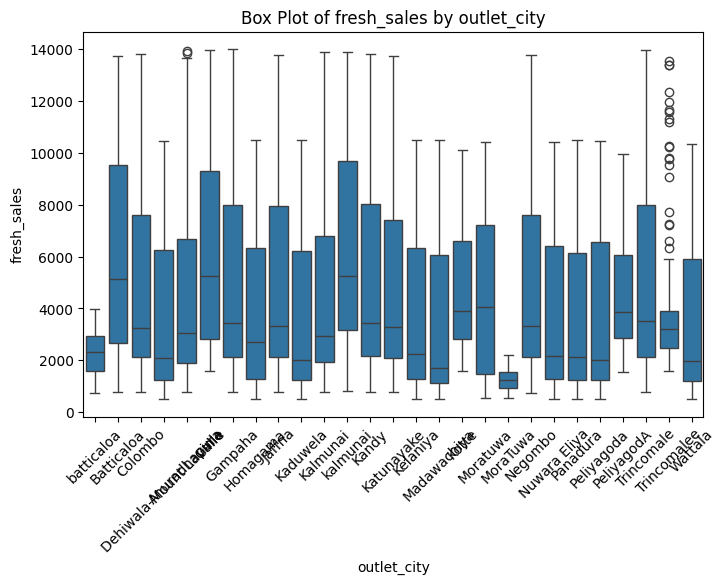

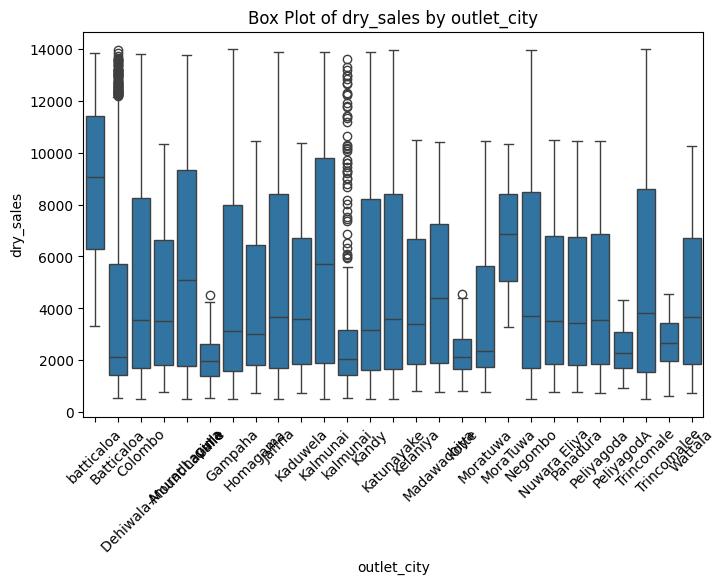

In [ ]:
# Checking relationship between a categorical and a numerical variable
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Generate boxplots for numerical variables grouped by each categorical variable
for cat_col in categorical_cols:
    for num_col in numeric_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f"Box Plot of {num_col} by {cat_col}")
        plt.xticks(rotation=45)
        plt.show()

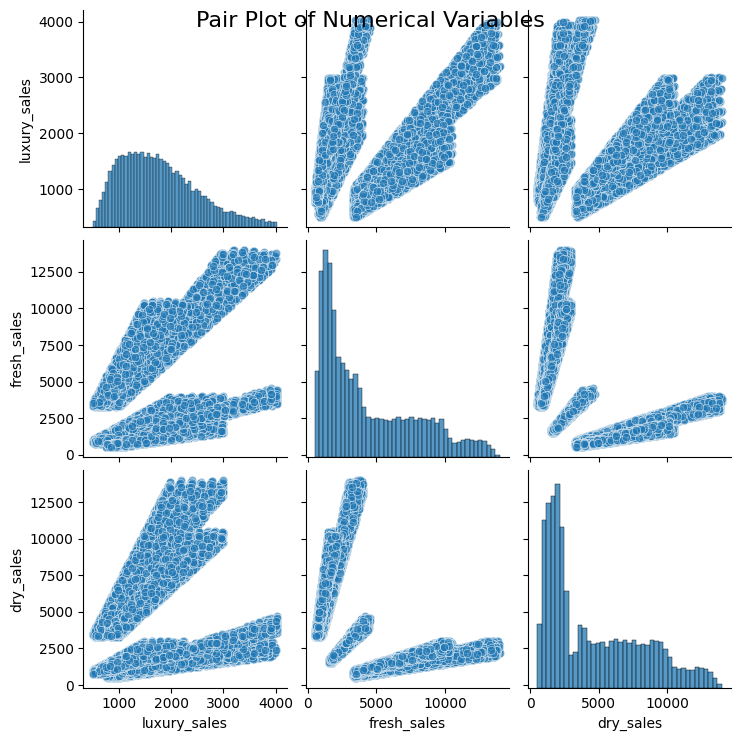

In [ ]:
#Multivariate Analysis
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['Customer_ID'], errors='ignore')

# Create Pair Plot
sns.pairplot(numeric_cols, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numerical Variables", fontsize=16)
plt.show()

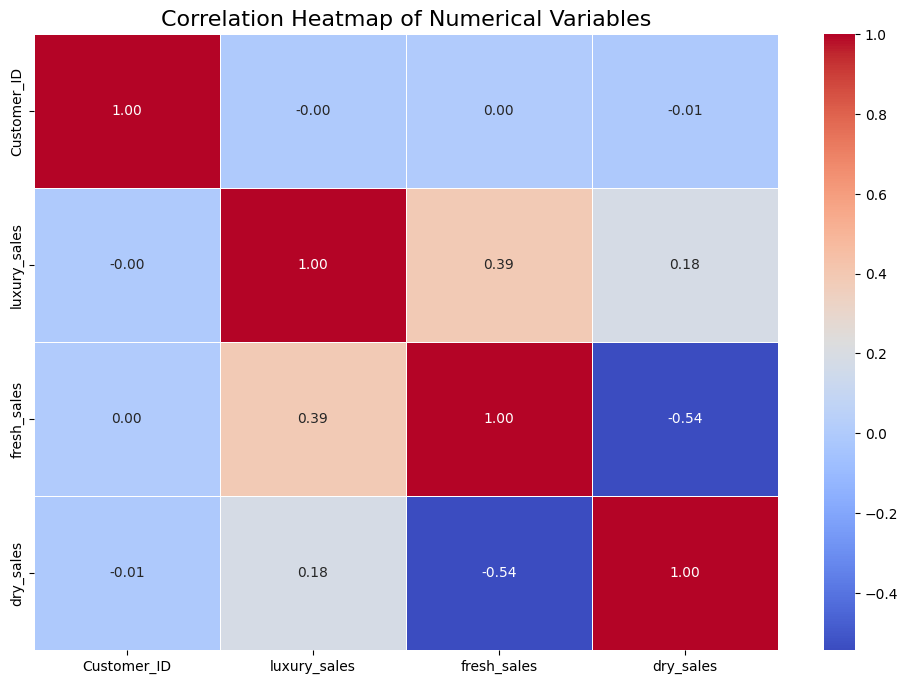

In [ ]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Encoding Categorical Variable (One-Hot Encoding for 'outlet_city')
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated argument
encoded_cities = encoder.fit_transform(df[['outlet_city']])
city_df = pd.DataFrame(encoded_cities, columns=encoder.get_feature_names_out(['outlet_city']))

In [ ]:
# Concatenate encoded columns and drop original
df = pd.concat([df, city_df], axis=1)
df.drop(columns=['outlet_city'], inplace=True)

In [ ]:
# Scaling Sales Columns
scaler = StandardScaler()
sales_columns = ['luxury_sales', 'fresh_sales', 'dry_sales']
df[sales_columns] = scaler.fit_transform(df[sales_columns])

In [ ]:
# Display final processed dataset
print(df.head())

   Customer_ID  luxury_sales  fresh_sales  dry_sales  outlet_city_Batticaloa  \
0        33574      1.225105    -0.243641   2.254986                     0.0   
1        10089     -0.083780    -0.537594   1.368483                     0.0   
2        38329     -1.250259    -0.927550   0.150868                     0.0   
3        11376     -0.191091    -0.612326   1.321467                     0.0   
4        12410     -1.000286    -0.846750   0.217809                     0.0   

   outlet_city_Colombo  outlet_city_Dehiwala-Mount Lavinia  outlet_city_Galle  \
0                  0.0                                 0.0                0.0   
1                  0.0                                 0.0                0.0   
2                  0.0                                 0.0                0.0   
3                  0.0                                 0.0                0.0   
4                  0.0                                 0.0                0.0   

   outlet_city_Gampaha  outlet_c